In [18]:
import panns_inference
import librosa
import os
import pandas as pd
import numpy as np

at = panns_inference.AudioTagging(checkpoint_path='models/Cnn14_mAP=0.431.pth', device='cuda')
csv_file = 'Datasets/scrapper_train_dataset.csv'
AUD_DIR = '../audioData/sythenticSoundscenes/train/'
scrapper_train_df = pd.read_csv(csv_file)

Checkpoint path: models/Cnn14_mAP=0.431.pth
GPU number: 4


In [17]:
#scrapper_train_df['audio_fileNames'][1::].shape

In [19]:
sample_audio0 = os.path.join(AUD_DIR, scrapper_train_df['audio_fileNames'][0])

(audio0, _) = librosa.core.load(sample_audio0)
audio0 = audio0[None, :]
(clipwise_op, embeddings) = at.inference(audio0)

for file in scrapper_train_df['audio_fileNames'][1::]:
    audio_file = os.path.join(AUD_DIR, file)
    (audio, _) = librosa.core.load(audio_file)
    audio = audio[None, :]

    (clipwise_op0, embeddings0) = at.inference(audio)
    embeddings = np.concatenate((embeddings, embeddings0), axis=0)


/work/dpandya/miniconda3/envs/noiseremoval/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


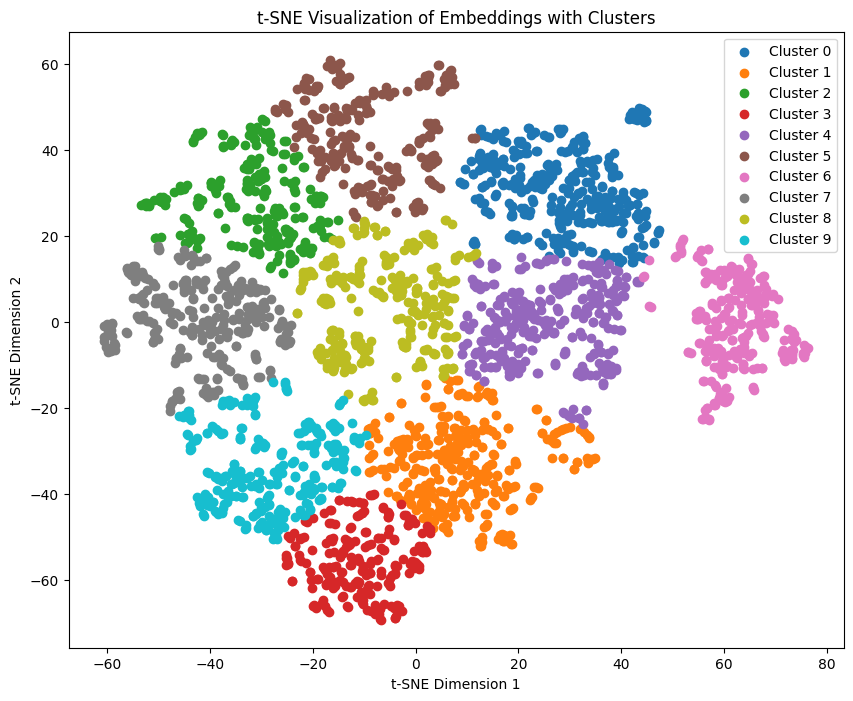

In [27]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Clustering with K-means
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(embeddings_tsne)

# Plot clustered embeddings
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(embeddings_tsne[clusters == i, 0], embeddings_tsne[clusters == i, 1], label=f'Cluster {i}')
plt.title('t-SNE Visualization of Embeddings with Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [38]:
import re
pattern = r'[^a-zA-Z0-9\s]'

labels_list = []
labels_set = set()

for lab in scrapper_train_df['acoustic_scene_label']:
    #lab = re.sub(pattern, '', lab)
    labels_list.append(lab.split(' '))
    labels_set.update(lab.split(' '))

In [45]:
true_labels = (scrapper_train_df['acoustic_scene_label'].apply(list(labels_set).index))


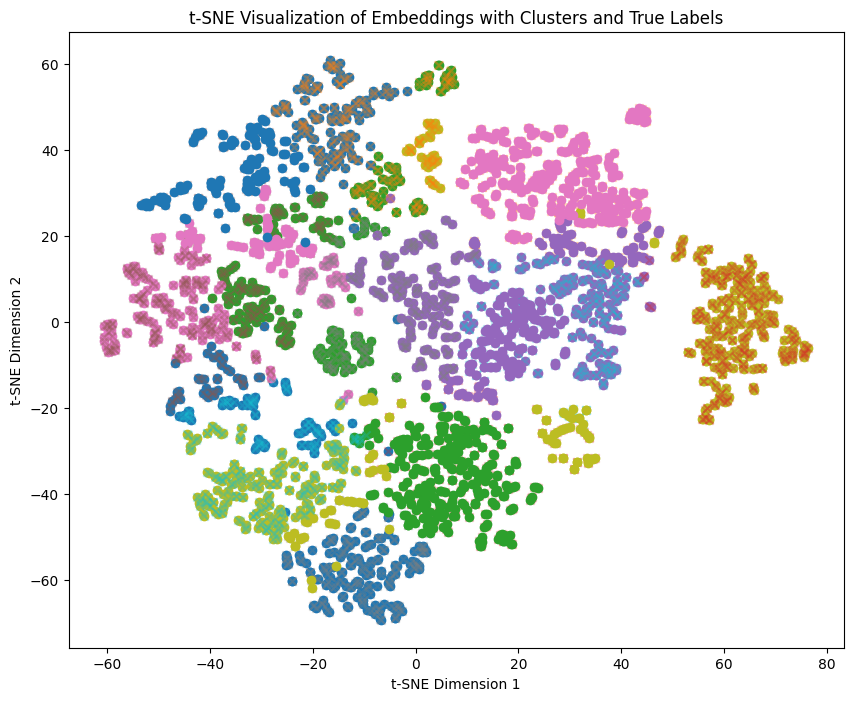

In [51]:
# Plot clustered embeddings with true class labels
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(embeddings_tsne[true_labels == i, 0], embeddings_tsne[true_labels == i, 1], label=f'True Class {i}', marker='o', alpha=1.0)
    plt.scatter(embeddings_tsne[clusters == i, 0], embeddings_tsne[clusters == i, 1], label=f'Cluster {i}', marker='x', alpha=0.3)

plt.title('t-SNE Visualization of Embeddings with Clusters and True Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [23]:
clusters.shape, embeddings_tsne.shape

((3000,), (3000, 2))